# Titanic - Machine Learning from Disaster

### Adam Robinson

This project applies an end-to-end machine learning workflow to the Kaggle '_Titanic: Machine Learning from Disaster_' dataset. The goal is to predict passenger survival based on personal information such as age, sex, class and fare.

The workflow will be broken down into five key stages as follows:
1. Data Loading
2. Exploratory Data Analysis
3. Data Preprocessing
4. Model Training
5. Model Evaluation

## 1. Importing Libraries
First, we need to import the necessary libraries for data analysis and visualisation.
- `pandas` for data manipulation.
- `numpy` for numerical operations.
- `matplotlib` and `seaborn` for data visualisation.

In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## 2. Loading the data
We now load the training and test datasets and take a first look at the raw data from the training set.

In [8]:
# Load train and test datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**Observations:**
- The data set includes features such as `Pclass` (ticket class), `Sex`, `Age`, `Fare` etc.
- The target variable is `Survived` (0 = did not survive, and 1 = survived).
- All of the data provided can be used to enhance predictions of whether each individual survived.
- There exists missing data entries which we will need to resolve during preprocessing.
- We have categoric variables in `Sex` and `Embarked` which should be converted to numeric.
- Other variables including `Cabin` and `Ticket` seem irrelevant and could be discarded from the dataset.

## 3. Exploratory Data Analysis

We will start by examining the structure of the dataset, summary statistics and missing values.

In [12]:
# Overview of the data
print("Dataset Info:")
train.info()

# Statistical summary of numerical and categorical features
print("\nSummary Statistics:")
display(train.describe())

# Check for missing values
print("\nMissing Values:")
display(train.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Summary Statistics:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Missing Values:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We will then examine the `Survival`, `Pclass` and `Sex` features independently to understand their distributions.

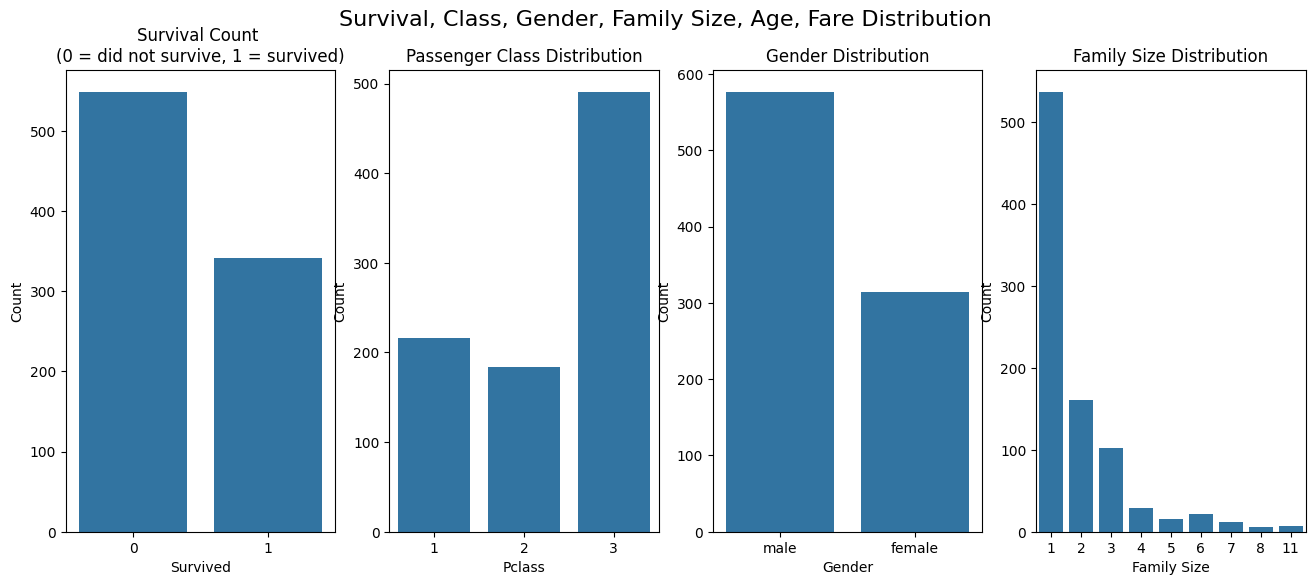

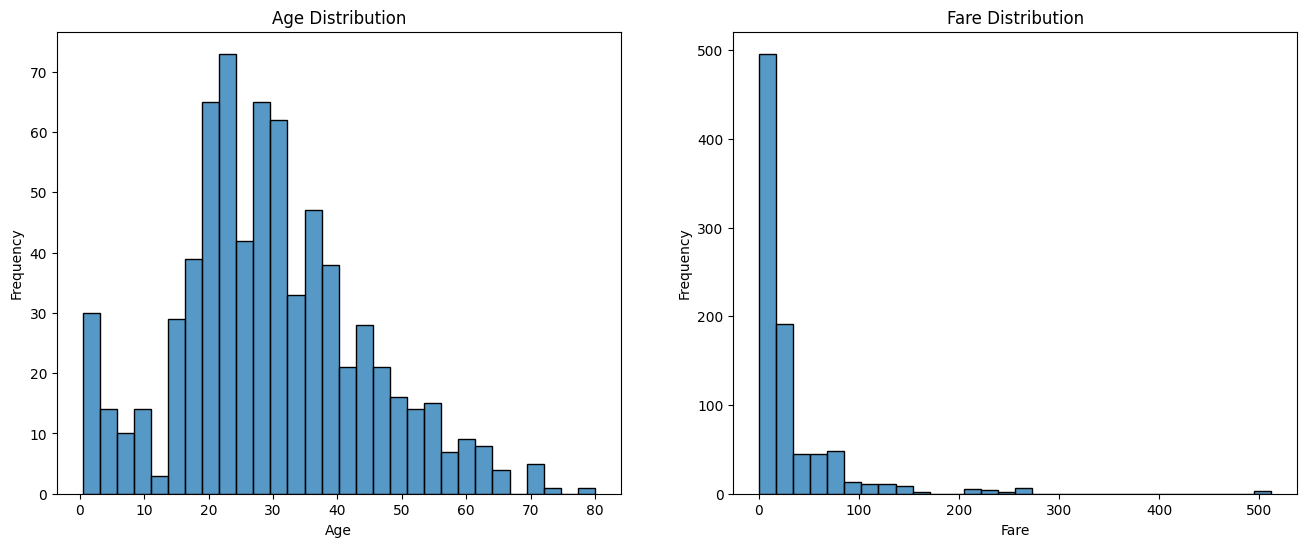

In [14]:
# Create a grid for plots
fig, top = plt.subplots(1, 4, figsize=(16, 6))
top = top.flatten()
fig.suptitle("Survival, Class, Gender, Family Size, Age, Fare Distribution", fontsize=16)

# Survival count
sns.countplot(ax=top[0], x='Survived', data=train)
top[0].set_title('Survival Count \n(0 = did not survive, 1 = survived)')
top[0].set_xlabel('Survived')
top[0].set_ylabel('Count')

# Passenger class distribution
sns.countplot(ax=top[1], x='Pclass', data=train)
top[1].set_title('Passenger Class Distribution')
top[1].set_xlabel('Pclass')
top[1].set_ylabel('Count')

# Gender distribution
sns.countplot(ax=top[2], x='Sex', data=train)
top[2].set_title('Gender Distribution')
top[2].set_xlabel('Gender')
top[2].set_ylabel('Count')

# Family size distribution
family_sizes = train['SibSp'] + train['Parch'] + 1
sns.countplot(ax=top[3], x=family_sizes, data=train)
top[3].set_title('Family Size Distribution')
top[3].set_xlabel('Family Size')
top[3].set_ylabel('Count')

fig, bottom = plt.subplots(1, 2, figsize=(16, 6))
bottom = bottom.flatten()

# Age distribution
sns.histplot(train['Age'].dropna(), bins=30, ax=bottom[0])
bottom[0].set_title('Age Distribution')
bottom[0].set_xlabel('Age')
bottom[0].set_ylabel('Frequency')

# Fare distribution
sns.histplot(train['Fare'].dropna(), bins=30, ax=bottom[1])
bottom[1].set_title('Fare Distribution')
bottom[1].set_xlabel('Fare')
bottom[1].set_ylabel('Frequency');


**Observations**
- There were fewer survivors than non-survivors.
- There were a significantly greater number of passengers in 3rd class than 1st and 2nd class
- There were more male passengers than female.
- The majority of families were small, with an overwhelming number of solo passengers.
- Age is distributed mainly towards young adults with the highest concentration of passengers falling between 20-35 years old.
- The majority of fares were low with the majority of passengers paid less than £100 however, a few passengers paid much higher amounts.

We will now consider how each of these factors affects the likelihood of the passengers surviving.

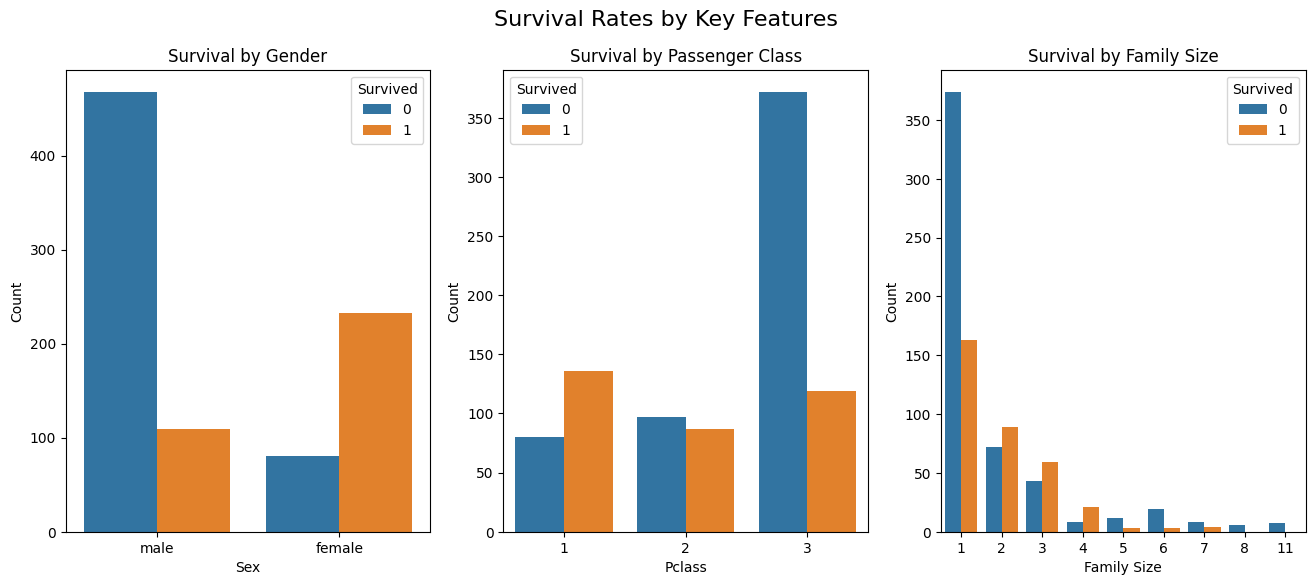

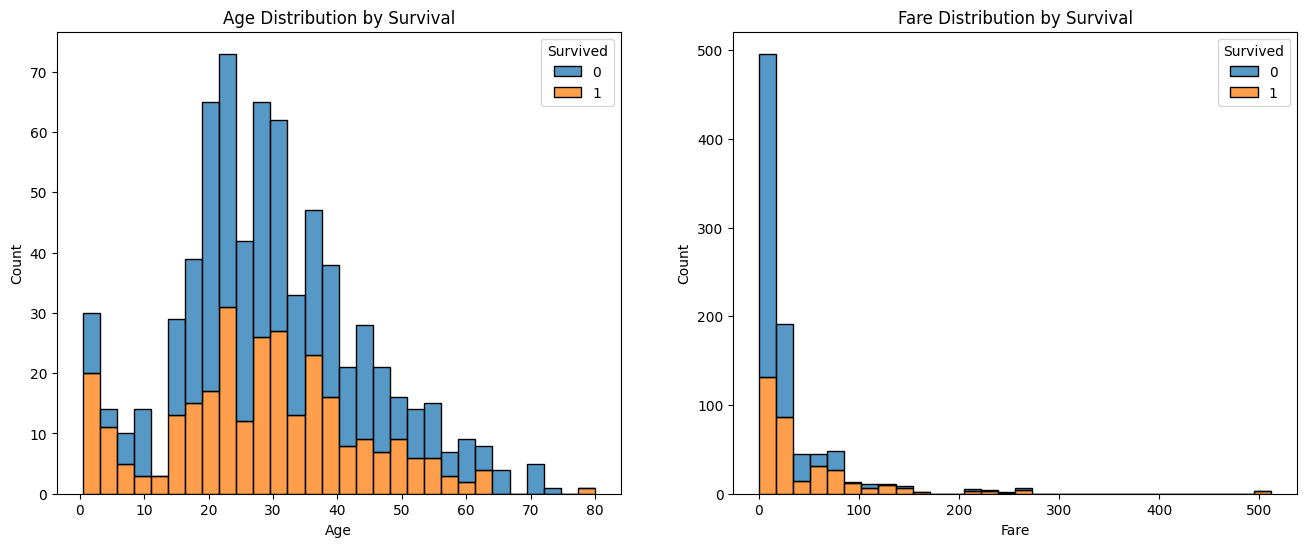

In [16]:
# Create a grid for plots
fig, top = plt.subplots(1, 3, figsize=(16, 6))
top = top.flatten()
fig.suptitle("Survival Rates by Key Features", fontsize=16)

# Survival by gender
sns.countplot(ax=top[0], x='Sex', hue='Survived', data=train)
top[0].set_title('Survival by Gender')
top[0].set_xlabel('Sex')
top[0].set_ylabel('Count')

# Survival by class
sns.countplot(ax=top[1], x='Pclass', hue='Survived', data=train)
top[1].set_title('Survival by Passenger Class')
top[1].set_xlabel('Pclass')
top[1].set_ylabel('Count')

# Survival by family size
sns.countplot(ax=top[2], x=family_sizes, hue='Survived', data=train)
top[2].set_title('Survival by Family Size')
top[2].set_xlabel('Family Size')
top[2].set_ylabel('Count')

fig, bottom = plt.subplots(1, 2, figsize=(16, 6))
bottom = bottom.flatten()

# Survival by age
sns.histplot(data=train, x='Age', hue='Survived', multiple='stack', bins=30, ax=bottom[0])
bottom[0].set_title('Age Distribution by Survival')
bottom[0].set_xlabel('Age')
bottom[0].set_ylabel('Count')

# Survival by fare
sns.histplot(data=train, x='Fare', hue='Survived', multiple='stack', bins=30, ax=bottom[1])
bottom[1].set_title('Fare Distribution by Survival')
bottom[1].set_xlabel('Fare')
bottom[1].set_ylabel('Count');

**Observations**
- A significantly higher proportion of females survived than males.
- Passengers in first class had the highest survival rate, followed by passengers in second class, passengers in third class were much less likely to survive.
- Families of sizes 2-4 were most likely to survive, solo travellers and large families were much less likely to survive.
- Young passengers, aged under 10, were most likely to survive whereas older passengers, above 50, were less likely to survive.
- Passengers that paid higher fares were more likely to survive.

## 4. Data Preprocessing

To prepare the data for modelling, we will:
1. Combine the train and test data sets to ensure consistency.
2. Handle missing values: `Embarked` and `Fare` using mode and median, and training a linear regression model to predict `age` - since there is a greater amount of missing values.
3. Calculate implicit features, such as family size, from the given data.
5. Convert categorical features into numerical values.
6. Remove unhelpful columns to simplify the model. 

In [19]:
def preprocess(df):
    df = df.copy()

    # Convert categorical features to numerical
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    
    # Create family size column
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    
    # Handle missing values 
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    df = predict_age(df)
    
    # Drop unnecessary columns
    df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
    return df

def predict_age(df):
    df = df.copy()
    
    # Features to use to predict age
    features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'FamilySize', 'Fare', 'Embarked']
    
    # Split known and unknown age rows
    known_age = df[df['Age'].notna()]
    unknown_age = df[df['Age'].isna()]

    # Define features and target variable
    X = known_age[features]
    y = known_age['Age']

    # Train linear regression model
    model = LinearRegression()
    model.fit(X, y)
        
    # Predict missing ages
    df.loc[df['Age'].isna(), 'Age'] = model.predict(unknown_age[features])
    return df

# Preprocess the train and test data
train_cleaned = preprocess(train)
test_cleaned = preprocess(test)

train_cleaned.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0,3,0,22.000000,1,0,7.2500,0.0,2
1,2,1,1,1,38.000000,1,0,71.2833,1.0,2
2,3,1,3,1,26.000000,0,0,7.9250,0.0,1
3,4,1,1,1,35.000000,1,0,53.1000,0.0,2
4,5,0,3,0,35.000000,0,0,8.0500,0.0,1
5,6,0,3,0,27.737912,0,0,8.4583,2.0,1
6,7,0,1,0,54.000000,0,0,51.8625,0.0,1
7,8,0,3,0,2.000000,3,1,21.0750,0.0,5
8,9,1,3,1,27.000000,0,2,11.1333,0.0,3
9,10,1,2,1,14.000000,1,0,30.0708,1.0,2


## 5. Model Training
We will use a random forest classifier to train the model, the data will be split as follows:
- Features (`X`): All columns except `Survived` and `PassengerId`.
- Target (`Y`): The `Survived` column.

We'll use a random forest model as it makes predictions using many smaller decision trees. This means that it is suitable for discrete outcomes, such as survival, it is also able to show which passenger details were most important for survival.

In [21]:
X = train_cleaned.drop(["Survived", "PassengerId"], axis=1)
y = train_cleaned["Survived"]

X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=42)

# Train random forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_validate)

## 6. Model Evaluation

We will use a range of evaluation metrics to measure the performance of the model, and examine the most important features for predicting a passenger's survival.


Validation Accuracy : 0.8268
Precision           : 0.7945
Recall              : 0.7838
F1 Score            : 0.7891


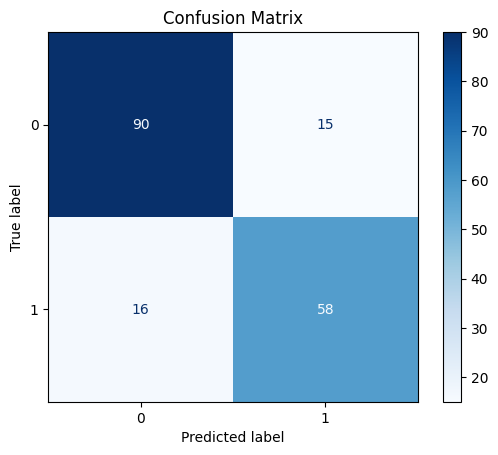


Feature Importances:
      Feature  Importance
2         Age    0.272827
1         Sex    0.262662
5        Fare    0.249354
0      Pclass    0.072113
7  FamilySize    0.053230
6    Embarked    0.032754
3       SibSp    0.032521
4       Parch    0.024539


In [23]:
# Evaluation metrics
print(f"\nValidation Accuracy : {accuracy_score(y_validate, predictions):.4f}")
print(f"Precision           : {precision_score(y_validate, predictions):.4f}")
print(f"Recall              : {recall_score(y_validate, predictions):.4f}")
print(f"F1 Score            : {f1_score(y_validate, predictions):.4f}")

# Create and plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_validate, predictions, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Feature importance
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_}
                                  ).sort_values('Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

These results confirm that this Random Forest model successfully predicted the Titanic passenger survival with strong accuracy (82.68%). The model also has strong precision (79.45%), recall (78.38%) and F1 score (78.91%). Feature importance highlighted that sex, fare and age are the strongest indicators, this supports historical evidence that women, children and the wealthy had higher survival chances.

Overall, this project shows the effectiveness of combining EDA, preprocessing and machine learning to build accurate machine learning models. While this model performs well, future work could make further use of feature engineering and explore advanced machine learning algorithms, such as gradient boosting, to enhance performance.

## 7. Test Predictions

We finally deploy the model to make predictions using the test set for submission to Kaggle.

In [26]:
# Select features from cleaned test set
X_test = test_cleaned.drop(["PassengerId"], axis=1)

# Generate predictions
test_predictions = model.predict(X_test)

# Create submission data frame
submission = pd.DataFrame({
    "PassengerId": test_cleaned["PassengerId"],
    "Survived": test_predictions
})

# Save to CSV
submission.to_csv("submission.csv", index=False)

submission.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
